# **EDA on Titanic dataset**

### 🔗 **Recommended Video for Refreshing EDA Concepts**

To refresh your understanding of Exploratory Data Analysis (EDA), I recommend the following video:

- [Exploratory Data Analysis Tutorial | Basics of EDA with Python](https://www.youtube.com/watch?v=05w2322DHUI&utm_source=chatgpt.com)  
  This tutorial provides a comprehensive overview of EDA techniques using Python, covering data visualization, summarization, and analysis methods.

- [Step-by-Step Guide to Exploratory Data Analysis with Python](https://www.youtube.com/watch?v=v6unD7pemN4&utm_source=chatgpt.com)  
  This video offers a detailed guide to performing EDA using Python, walking through key concepts and practical applications.

These resources should help you effectively refresh and enhance your EDA skills.


## **Load Dataset**

In [1]:
import pandas as pd

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df = titanic_df.drop(['Name'], axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## **Distribution Analysis**

### **Data Size**

In [3]:
# Data size: Number of features and number of data points
num_features = titanic_df.shape[1]
num_data_points = titanic_df.shape[0]

print(f"Number of features: {num_features}")
print(f"Number of data points: {num_data_points}")


Number of features: 11
Number of data points: 891


### **Missing Values**

In [4]:
missing_values = titanic_df.isnull().sum()
print("Number of missing values for each feature:\n", missing_values)

Number of missing values for each feature:
 PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
#Conditional median imputation to handle missing values in age
age_median = titanic_df.groupby(['Pclass', 'Sex'])['Age'].median()
age_median

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

**Explanation:**

Group the dataset by Pclass first, then sex second to get the medium of age in each group

In [6]:
# for each empty entry in the age feature, we substitute it by the median of the the feature for that Pclass and sex
titanic_df['Age'] = titanic_df.apply(
    lambda row: age_median[row['Pclass'], row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1
)
missing_values = titanic_df.isnull().sum()
print("Number of missing values for each feature:\n", missing_values)

Number of missing values for each feature:
 PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Explanation**

This code performs the following steps to handle missing values in the `Deck` column of the Titanic dataset:

1. **Extract Deck Information**:  
   The code starts by extracting the first letter of the `Cabin` column, which represents the deck. It then removes any invalid entries (like spaces) by replacing them with `None`.

2. **Find the Most Common Deck for Each Pclass**:  
   The code groups the data by `Pclass` (passenger class) and calculates the most frequent deck (`mode`) for each class. This helps identify which deck is most common for each passenger class. If no mode exists (e.g., no common deck), it assigns `None` for that group.

3. **Impute Missing Deck Values**:  
   The code then applies a function to fill in any missing values in the `Deck` column. For rows with missing deck values, it assigns the most common deck (`mode`) for that passenger's `Pclass`. This ensures that the missing values are filled in based on a logical, class-specific rule.

The result is that the missing deck values are imputed based on the most frequent deck for each passenger class.


In [7]:
# Step 1: Extract deck information
titanic_df['Deck'] = titanic_df['Cabin'].str[0]  # Extract first letter
# Remove any whitespace or invalid entries
titanic_df['Deck'] = titanic_df['Deck'].replace(' ', None)

# Step 2: Find the most common deck (mode) for each Pclass
deck_mode_by_pclass = titanic_df.groupby('Pclass')['Deck'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print("Most common deck for each Pclass:\n", deck_mode_by_pclass)

# Step 3: Impute missing values in the Deck column based on Pclass
def impute_deck(row):
    if pd.isnull(row['Deck']):
        return deck_mode_by_pclass[row['Pclass']]
    return row['Deck']

titanic_df['Deck'] = titanic_df.apply(impute_deck, axis=1)


Most common deck for each Pclass:
 Pclass
1    C
2    F
3    F
Name: Deck, dtype: object


**Explanation**

This code addresses missing data in the Titanic dataset and removes the `Cabin` column. Here's an overview of the steps:

1. **Find the Most Common Embarkation Point for Each Pclass**:  
   The dataset is grouped by `Pclass` (passenger class), and the most frequent value (mode) for the `Embarked` column is calculated for each group. This provides the most common embarkation point for each class. If there is no mode (no common embarkation point), `None` is returned for that group.

2. **Impute Missing Embarked Values**:  
   A function called `impute_embarked` is used to fill missing values (`NaN`) in the `Embarked` column. If a row has a missing value in `Embarked`, the function assigns the most common embarkation point corresponding to that passenger's `Pclass`. If the value is not missing, it retains the existing value.

3. **Drop the Cabin Column**:  
   The `Cabin` column is dropped from the dataset using `drop()`. This might be because the column contains many missing values, or it is not necessary for further analysis.

In summary, the code imputes missing embarkation points based on passenger class and removes the `Cabin` column from the dataset.


In [8]:
embarked_mode_by_pclass = titanic_df.groupby('Pclass')['Embarked'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print("Most common embarkation point for each Pclass:\n", embarked_mode_by_pclass)

def impute_embarked(row):
    if pd.isnull(row['Embarked']):
        return embarked_mode_by_pclass[row['Pclass']]
    return row['Embarked']

titanic_df['Embarked'] = titanic_df.apply(impute_embarked, axis=1)
titanic_df = titanic_df.drop( ['Cabin'], axis=1)


Most common embarkation point for each Pclass:
 Pclass
1    S
2    S
3    S
Name: Embarked, dtype: object


**Explanation**



1.   Find the most common embarkation point (mode) for each Pclass
2.   Impute missing values in the Embarked column based on Pclass



### **Summary Statistics**

In [9]:
summary_stats = titanic_df.describe()
print("Summary statistics:\n")
summary_stats

Summary statistics:



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,F
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,F
3,4,1,1,female,35.0,1,0,113803,53.1000,S,C
4,5,0,3,male,35.0,0,0,373450,8.0500,S,F


In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
titanic_df['Sex'] = label_encoder.fit_transform(titanic_df['Sex'])
titanic_df['Embarked'] = label_encoder.fit_transform(titanic_df['Embarked'])
titanic_df['Deck'] = label_encoder.fit_transform(titanic_df['Deck'])
titanic_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2,5
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2,5
3,4,1,1,0,35.0,1,0,113803,53.1000,2,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2,5


In [12]:
# Extract ticket prefixes
titanic_df['Ticket_Prefix'] = titanic_df['Ticket'].str.extract(r'([A-Za-z\.\/]+)', expand=False).fillna('None')

# Extract ticket group size
ticket_group_size = titanic_df.groupby('Ticket')['PassengerId'].transform('count')
titanic_df['Ticket_Group_Size'] = ticket_group_size

# Display sample of Ticket-related features
titanic_df[['Ticket', 'Ticket_Prefix', 'Ticket_Group_Size']].head()

,Ticket,Ticket_Prefix,Ticket_Group_Size
0,A/5 21171,A/,1
1,PC 17599,PC,1
2,STON/O2. 3101282,STON/O,1
3,113803,None,2
4,373450,None,1


In [13]:
titanic_df = titanic_df.drop(['PassengerId', 'Ticket'], axis=1)
titanic_df['Ticket_Prefix'] = label_encoder.fit_transform(titanic_df['Ticket_Prefix'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Get the column names before transforming the data
original_columns = titanic_df.columns
titanic_df = min_max_scaler.fit_transform(titanic_df)

# Create DataFrame using the original column names
titanic_df = pd.DataFrame(titanic_df, columns=original_columns)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Ticket_Prefix,Ticket_Group_Size
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.714286,0.076923,0.000000
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.285714,0.410256,0.000000
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,0.714286,0.871795,0.000000
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.285714,0.358974,0.166667
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.714286,0.358974,0.000000


In [15]:
mode_values = titanic_df.mode().iloc[0]
print("Mode values for each feature:\n", mode_values)

Mode values for each feature:
 Survived             0.000000
Pclass               1.000000
Sex                  1.000000
Age                  0.308872
SibSp                0.000000
Parch                0.000000
Fare                 0.015713
Embarked             1.000000
Deck                 0.714286
Ticket_Prefix        0.358974
Ticket_Group_Size    0.000000
Name: 0, dtype: float64


**Explanation**

This code normalizes the Titanic dataset using Min-Max scaling and retains the original column names. Here's a breakdown of the steps:

1. **Initialize MinMaxScaler**:  
   The `MinMaxScaler` from `sklearn.preprocessing` is imported and initialized. This scaler transforms the data to a range between 0 and 1, which is commonly used for normalizing numerical features.

2. **Store the Original Column Names**:  
   Before transforming the data, the original column names of the dataset are stored in the `original_columns` variable. This ensures that the column names are preserved after the transformation.

3. **Apply Min-Max Scaling**:  
   The `fit_transform` method of `MinMaxScaler` is used on the `titanic_df` DataFrame to scale all numerical columns in the dataset. The `fit_transform` method computes the minimum and maximum values for each feature and scales the data accordingly.

4. **Create a DataFrame with the Original Column Names**:  
   After transforming the data, a new DataFrame is created using the scaled values and the original column names, which are passed as the `columns` argument. This ensures that the transformed data maintains the same structure as the original dataset.

5. **Display the First Few Rows**:  
   The `head()` method is called to display the first few rows of the transformed DataFrame.

In summary, the code normalizes the Titanic dataset using Min-Max scaling while preserving the original column names and displays the first few rows of the transformed data.


### **Skewness**

In [16]:
import numpy as np
# Skewness for numerical features
skewness = titanic_df.select_dtypes(include=[np.number]).skew()
print("Skewness for each numerical feature:\n", skewness)

Skewness for each numerical feature:
 Survived             0.478523
Pclass              -0.630548
Sex                 -0.618921
Age                  0.534083
SibSp                3.695352
Parch                2.749117
Fare                 4.787317
Embarked            -1.264823
Deck                -1.573450
Ticket_Prefix        1.884301
Ticket_Group_Size    2.220638
dtype: float64


In [17]:
import numpy as np

# Apply log transformation (log1p handles zero values safely)
# For highly skewed features like SibSp, Parch, and Fare, apply log1p transformation

# Apply log1p transformation to handle zero values in the data
titanic_df['SibSp_log'] = np.log1p(titanic_df['SibSp'])
titanic_df['Parch_log'] = np.log1p(titanic_df['Parch'])
titanic_df['Fare_log'] = np.log1p(titanic_df['Fare'])
titanic_df['Ticket_Group_Size'] = np.log1p(titanic_df['Ticket_Group_Size'])

# Recalculate skewness after transformation
skewness_after_log = titanic_df[['SibSp_log', 'Parch_log', 'Fare_log', 'Ticket_Group_Size']].skew()

# Print the skewness after transformation
print("Skewness after log transformation:")
print(skewness_after_log)

Skewness after log transformation:
SibSp_log            2.891947
Parch_log            2.240209
Fare_log             3.708250
Ticket_Group_Size    1.805855
dtype: float64


**Explanation**

This code applies a logarithmic transformation to certain features in the Titanic dataset to handle skewness and re-checks the skewness of the transformed features. Here's a breakdown of the steps:

1. **Log Transformation Using `log1p`**:  
   The `log1p` function from NumPy is applied to four features: `SibSp`, `Parch`, `Fare`, and `Ticket_Group_Size`. The `log1p` function is used instead of a regular logarithm to safely handle zero values, as it computes `log(1 + x)`. This transformation helps to reduce the skewness of highly skewed features, making them more normally distributed.

   - `SibSp_log`: Log-transformed values of `SibSp` (number of siblings/spouses aboard).
   - `Parch_log`: Log-transformed values of `Parch` (number of parents/children aboard).
   - `Fare_log`: Log-transformed values of `Fare` (ticket fare).
   - `Ticket_Group_Size`: Log-transformed values of `Ticket_Group_Size` (number of people in a ticket group).

2. **Recalculate Skewness After Transformation**:  
   After applying the log transformation, the skewness of the newly created columns (`SibSp_log`, `Parch_log`, `Fare_log`, `Ticket_Group_Size`) is recalculated using the `skew()` method. This helps to assess how well the transformation has reduced the skewness.

3. **Print Skewness**:  
   The skewness values for the transformed features are printed out. A skewness closer to 0 indicates that the data is more normally distributed, which is desirable for many machine learning algorithms.

In summary, this code applies a log transformation to handle skewed features in the dataset and checks how much the skewness has been reduced after the transformation.


### **Outlier Detection**

In [18]:
import numpy as np

# Z-score method
from scipy.stats import zscore
titanic_df['Fare_zscore'] = zscore(titanic_df['Fare'])
outliers_zscore = titanic_df[np.abs(titanic_df['Fare_zscore']) > 3]
print("Outliers detected using Z-score:\n", outliers_zscore[['Fare', 'Fare_zscore']])

Outliers detected using Z-score:
          Fare  Fare_zscore
27   0.513342     4.647001
88   0.513342     4.647001
118  0.483128     4.335332
258  1.000000     9.667167
299  0.483128     4.335332
311  0.512122     4.634417
341  0.513342     4.647001
377  0.412821     3.610065
380  0.444099     3.932723
438  0.513342     4.647001
527  0.432884     3.817033
557  0.444099     3.932723
679  1.000000     9.667167
689  0.412503     3.606793
700  0.444099     3.932723
716  0.444099     3.932723
730  0.412503     3.606793
737  1.000000     9.667167
742  0.512122     4.634417
779  0.412503     3.606793


In [19]:
# IQR method
Q1 = titanic_df['Fare'].quantile(0.25)
Q3 = titanic_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = titanic_df[(titanic_df['Fare'] < Q1 - 1.5 * IQR) | (titanic_df['Fare'] > Q3 + 1.5 * IQR)]
print("Outliers detected using IQR:\n", outliers_iqr[['Fare']])

Outliers detected using IQR:
          Fare
1    0.139136
27   0.513342
31   0.285990
34   0.160387
52   0.149765
..        ...
846  0.135753
849  0.173920
856  0.321798
863  0.135753
879  0.162314

[116 rows x 1 columns]


**Explanation**

This code identifies outliers in the `Fare` column of the Titanic dataset using two common statistical methods: Z-score and Interquartile Range (IQR). Here's a step-by-step explanation:

1. **Z-Score Method**:  
   - **Process**: The Z-score standardizes the `Fare` column by calculating how many standard deviations each value is from the mean.  
   - Outliers are detected by filtering rows where the absolute Z-score exceeds 3 (typically considered the threshold for outliers).  
   - The detected outliers, along with their Z-scores, are printed for review.

2. **IQR Method**:  
   - **Process**: The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the `Fare` column.  
   - Outliers are values falling below `Q1 - 1.5 * IQR` or above `Q3 + 1.5 * IQR`.  
   - These outliers are filtered from the dataset and printed for review.

In summary, this code uses statistical techniques (Z-score and IQR) to detect outliers in the `Fare` column, helping identify extreme values that may require further analysis or preprocessing.


## **Visualization Analysis**

### **Distribution of Features**

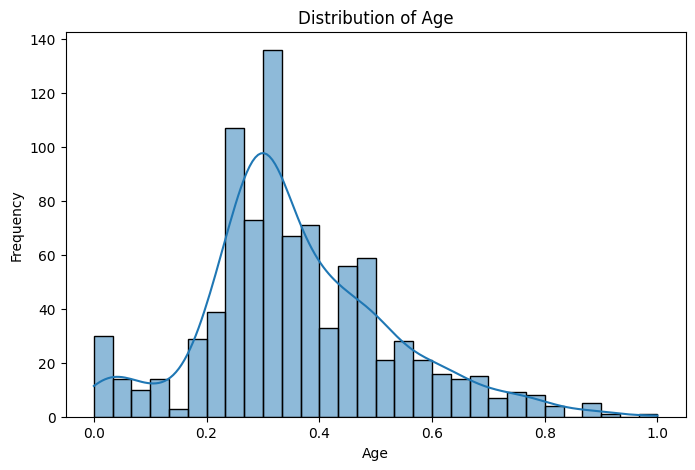

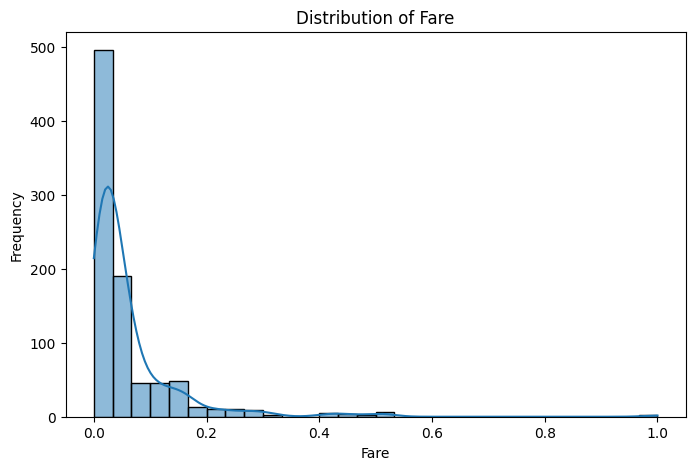

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select continuous features
continuous_features = ['Age', 'Fare']

# Plot distributions
for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(titanic_df[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

**Explanation**

This code visualizes the distribution of continuous features in the Titanic dataset to understand their spread and detect patterns, skewness, or potential outliers. Here's a step-by-step explanation:

1. **Select Continuous Features**:  
   - A list of continuous features (`Age` and `Fare`) is defined for visualization.

2. **Plot Distributions**:  
   - A `for` loop iterates through each continuous feature.  
   - For each feature:
     - A histogram is plotted using `sns.histplot`, showing the frequency of values.  
     - A kernel density estimate (KDE) curve is overlaid to visualize the probability density.  
     - The plot is customized with appropriate titles, x-axis labels, and y-axis labels for clarity.

3. **Display Each Plot**:  
   - Each feature's distribution is displayed in a separate figure for easy interpretation.


<ipython-input-21-7ad4edfc826b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic_df[feature], palette="Set2",


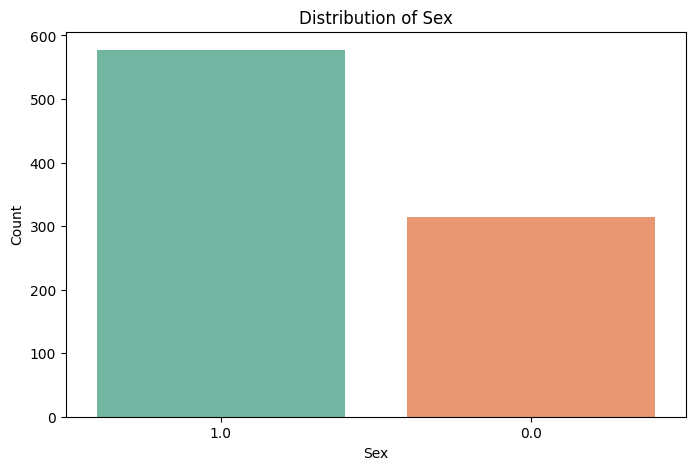

<ipython-input-21-7ad4edfc826b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic_df[feature], palette="Set2",


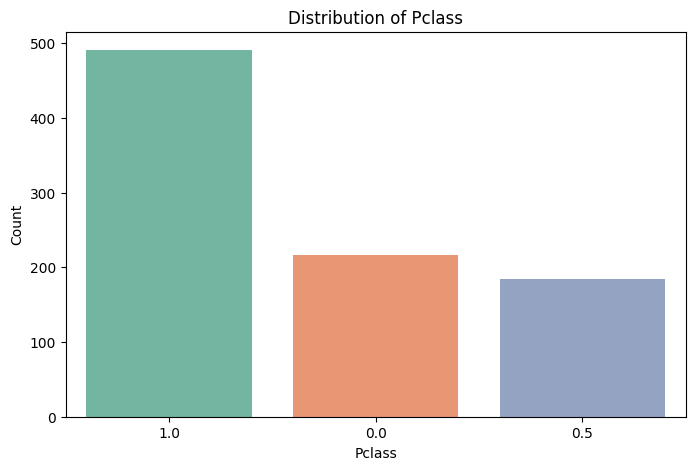

<ipython-input-21-7ad4edfc826b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=titanic_df[feature], palette="Set2",


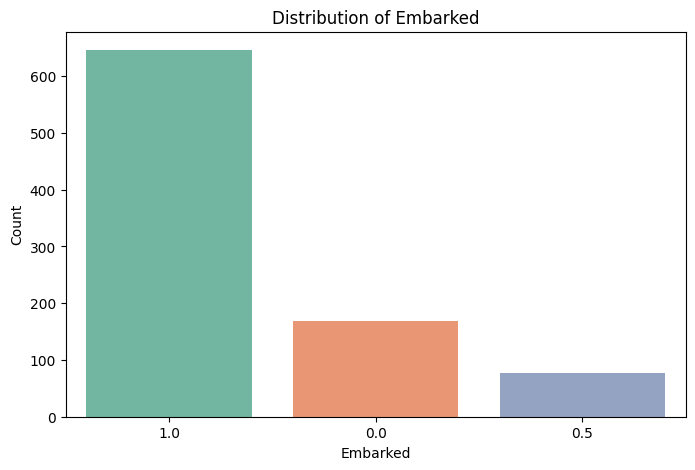

In [21]:
# Select categorical features
categorical_features = ['Sex', 'Pclass', 'Embarked']

# Plot distributions
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=titanic_df[feature], palette="Set2",
                  legend=False, order=titanic_df[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


**Explanation**

This code visualizes the distribution of categorical features in the Titanic dataset to understand their frequency and category dominance. Here's a step-by-step explanation:

1. **Select Categorical Features**:  
   - A list of categorical features (`Sex`, `Pclass`, `Embarked`) is defined for visualization.

2. **Plot Distributions**:  
   - A `for` loop iterates through each categorical feature.  
   - For each feature:
     - A count plot is created using `sns.countplot`, showing the frequency of each category in the feature.  
     - The `order` parameter ensures categories are displayed in descending order of their counts.  
     - The plot is styled with a color palette (`Set2`) and labeled with appropriate titles, x-axis labels, and y-axis labels for better readability.

3. **Display Each Plot**:  
   - Each feature's count distribution is displayed in a separate figure for clarity.



<ipython-input-22-75e8f552befc>:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, positions=positions, labels=features)


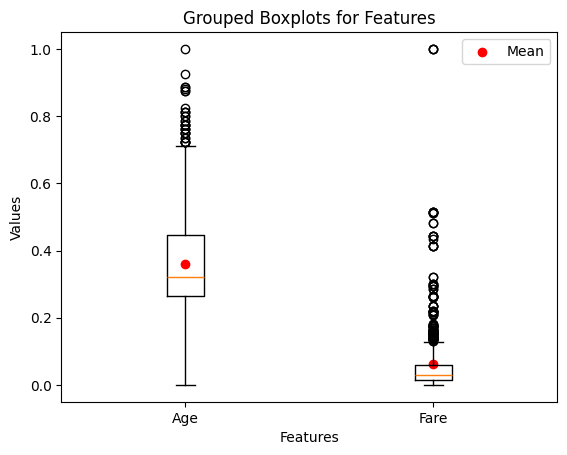

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select numerical features to compare
features = ['Age', 'Fare']
data = [titanic_df[feature].dropna() for feature in features]  # Extract data for each feature, drop missing values

# Create grouped boxplots
positions = range(1, len(data) + 1)  # Positions for boxplots
plt.boxplot(data, positions=positions, labels=features)

# Overlay means as red dots
means = [feature_data.mean() for feature_data in data]
for pos, mean in zip(positions, means):
    plt.scatter(pos, mean, color='red', label='Mean' if pos == 1 else "")  # Label only once for the legend

# Add labels and title
plt.title('Grouped Boxplots for Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.show()


**Explanation**

This code visualizes the distribution of numerical features in the Titanic dataset using grouped boxplots, with means overlaid for comparison. Here's a step-by-step explanation:

1. **Select Numerical Features**:  
   - A list of numerical features (`Age` and `Fare`) is defined for visualization.  
   - Missing values are dropped from each feature using `.dropna()` to ensure valid data.

2. **Create Grouped Boxplots**:  
   - A boxplot is created for each feature using `plt.boxplot`.  
   - The `positions` parameter specifies the placement of the boxplots, and `labels` assigns the corresponding feature names to each plot.

3. **Overlay Means**:  
   - The mean value for each feature is calculated using `.mean()`.  
   - Means are overlaid as red dots using `plt.scatter`.  
   - The legend is labeled "Mean" for the first feature and left empty for subsequent features to avoid duplication.

4. **Customize Plot**:  
   - Titles and axis labels are added to make the plot clear and informative.  
   - A legend is included to identify the overlaid mean values.

5. **Display the Plot**:  
   - The finalized plot is displayed, showing the spread, outliers, and mean values of the numerical features.



In [23]:
features_with_outliers = ['Age', 'Fare']

for feature in features_with_outliers:
    Q1 = titanic_df[feature].quantile(0.25)
    Q3 = titanic_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Step 3: Filter out the outliers
    titanic = titanic_df[(titanic_df[feature] >= lower_bound) & (titanic_df[feature] <= upper_bound)]

# Check the shape of the dataset after removing outliers
print(f"Shape of dataset after removing outliers: {titanic.shape}")

Shape of dataset after removing outliers: (775, 15)


**Explanation**

This code removes outliers from the `Age` and `Fare` columns in the Titanic dataset using the Interquartile Range (IQR) method. Here's a step-by-step explanation:

1. **Identify Features with Outliers**:  
   - A list of features (`Age`, `Fare`) likely containing outliers is defined for processing.

2. **Calculate IQR and Bounds**:  
   - For each feature in the list:
     - The first quartile (Q1) and third quartile (Q3) are calculated using `.quantile(0.25)` and `.quantile(0.75)`, respectively.  
     - The IQR is computed as `Q3 - Q1`.  
     - Lower and upper bounds for detecting outliers are determined as `Q1 - 1.5 * IQR` and `Q3 + 1.5 * IQR`.

3. **Filter Out Outliers**:  
   - Rows where the feature value is outside the calculated bounds are removed from the dataset.  
   - Only rows within the bounds are retained using boolean indexing.

4. **Check Dataset Shape**:  
   - The shape of the dataset after removing outliers is printed to confirm the reduction in rows.



### **Feature Interactions**

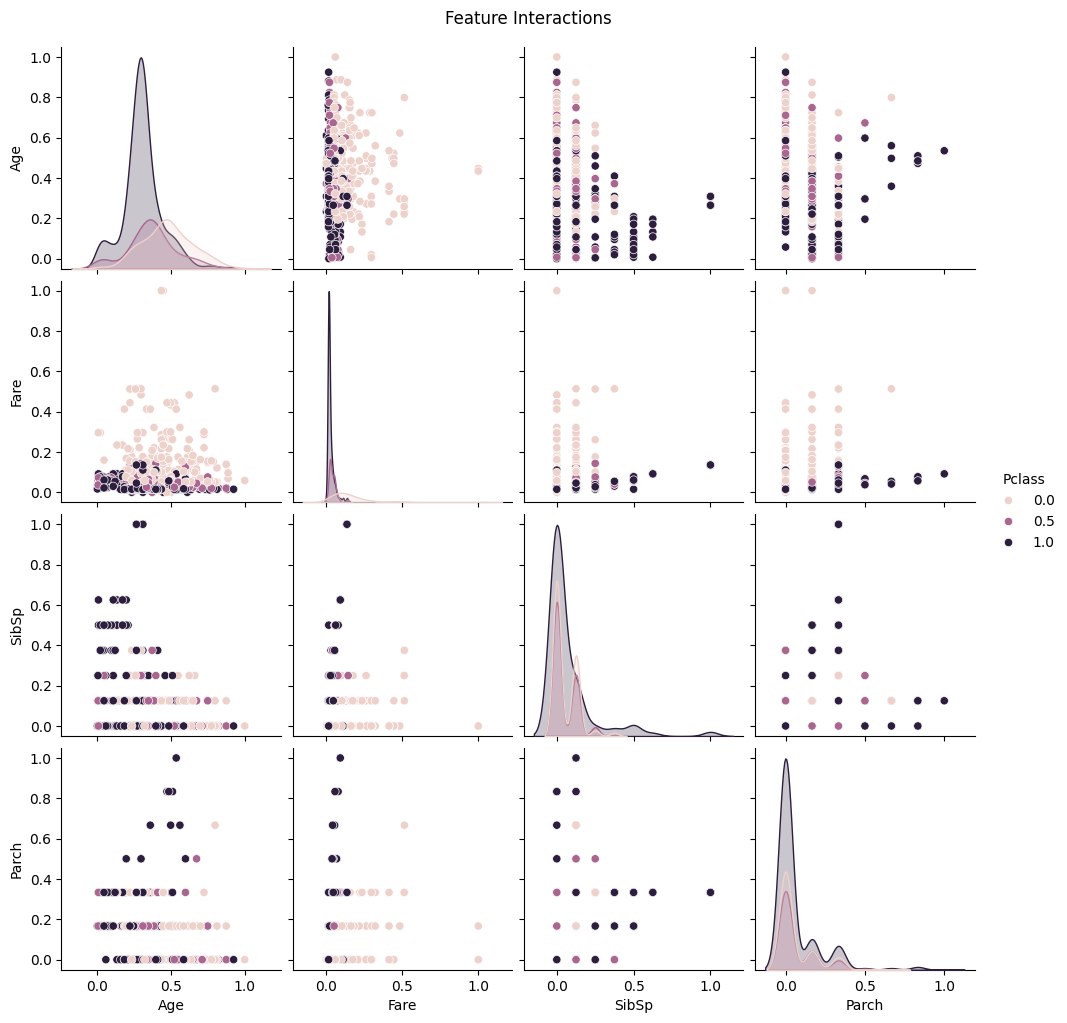

In [24]:
sns.pairplot(titanic_df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].dropna(),
             diag_kind='kde', hue='Pclass')
plt.suptitle('Feature Interactions', y=1.02)
plt.show()

**Explanation**

This code visualizes the pairwise relationships between selected features in the Titanic dataset using Seaborn's `pairplot`. Here's a step-by-step explanation:

1. **Select Features**:  
   - The features `Age`, `Fare`, `Pclass`, `SibSp`, and `Parch` are chosen for visualization.  
   - Missing values are removed using `.dropna()` to ensure valid data is used in the plot.

2. **Create Pairplot**:  
   - `sns.pairplot` generates a grid of scatter plots showing pairwise interactions between the selected features.  
   - The diagonal plots (`diag_kind='kde'`) display kernel density estimates (KDE) for each feature, representing their distributions.  
   - The `hue='Pclass'` parameter colors the data points by the `Pclass` feature, making it easier to analyze interactions across passenger classes.

3. **Add Title**:  
   - A supertitle (`'Feature Interactions'`) is added using `plt.suptitle` to provide context for the visualization.

4. **Display the Plot**:  
   - The finalized pairplot is displayed, showing feature interactions and distributions.



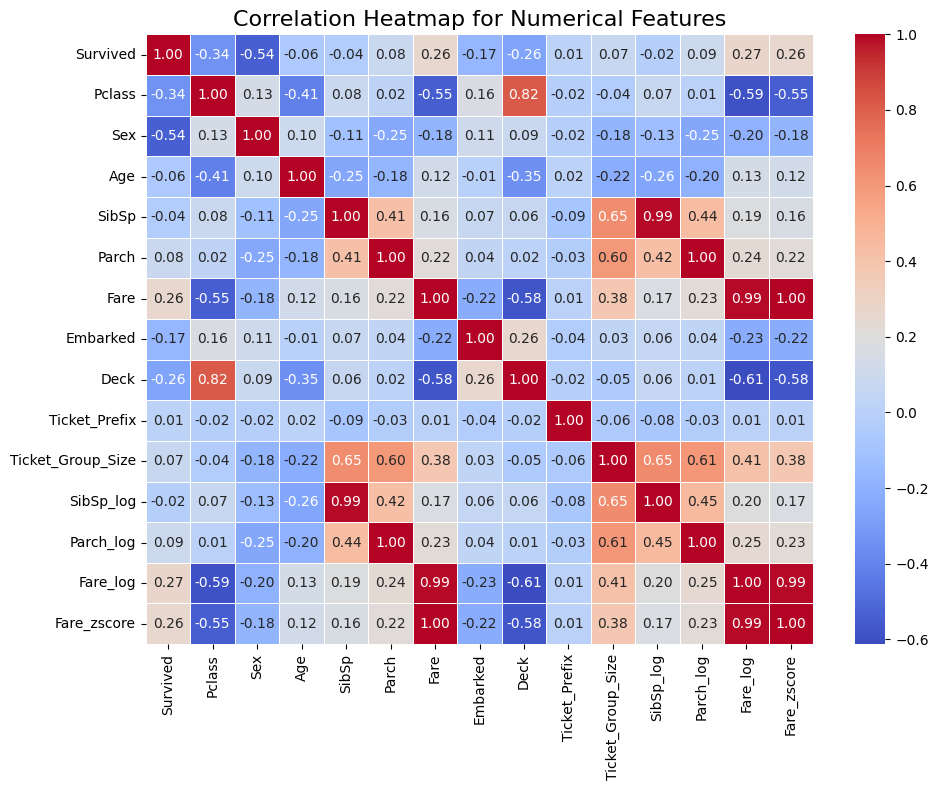

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = titanic_df.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 8))  # Adjust the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add titles and labels
plt.title('Correlation Heatmap for Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


**Explanation**

This code visualizes the correlation between numerical features in the Titanic dataset using a heatmap. Here's a step-by-step explanation:

1. **Calculate the Correlation Matrix**:  
   - The correlation matrix is computed using `titanic_df.corr()`, which calculates the Pearson correlation coefficients between all numerical features.

2. **Create a Heatmap**:  
   - `sns.heatmap` is used to generate a heatmap to visualize the correlation matrix.  
   - Key parameters include:
     - `annot=True`: Displays correlation values in each cell of the heatmap.  
     - `cmap='coolwarm'`: Sets the color scheme, where cool and warm colors represent negative and positive correlations, respectively.  
     - `fmt=".2f"`: Formats the correlation values to two decimal places.  
     - `linewidths=0.5`: Adds spacing between cells for better readability.

3. **Customize the Plot**:  
   - The figure size is adjusted to `(10, 8)` for clarity.  
   - A title (`'Correlation Heatmap for Numerical Features'`) is added to provide context for the visualization.  
   - `plt.tight_layout()` ensures proper spacing around the plot.

4. **Display the Heatmap**:  
   - The finalized heatmap is displayed, showing the strength and direction of relationships between numerical features.



### **Relationships between features and target output**

<ipython-input-26-2ac4f5e809b8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=titanic_df, x='Survived', y='Age', palette='coolwarm', split=True)


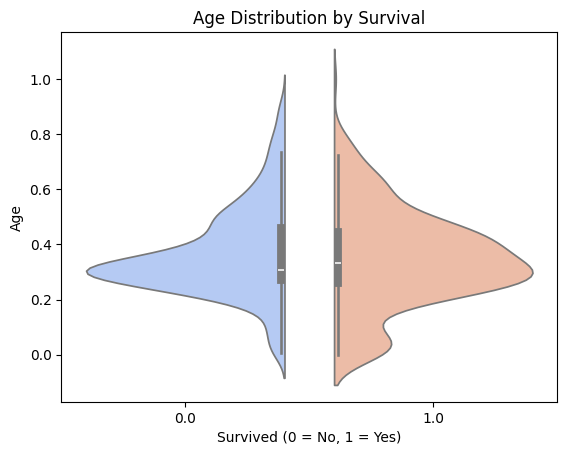

In [26]:
sns.violinplot(data=titanic_df, x='Survived', y='Age', palette='coolwarm', split=True)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


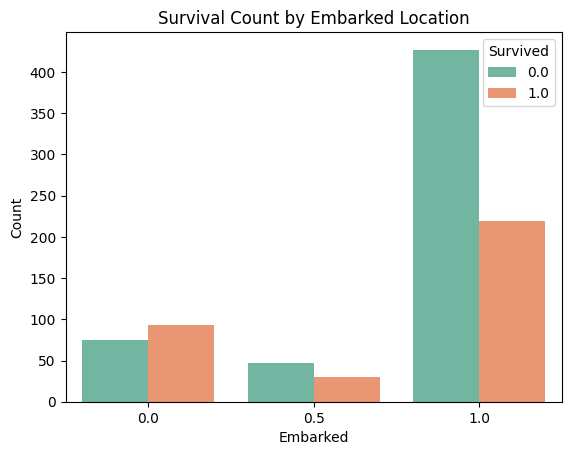

In [27]:
sns.countplot(data=titanic_df, x='Embarked', hue='Survived', palette='Set2')
plt.title('Survival Count by Embarked Location')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

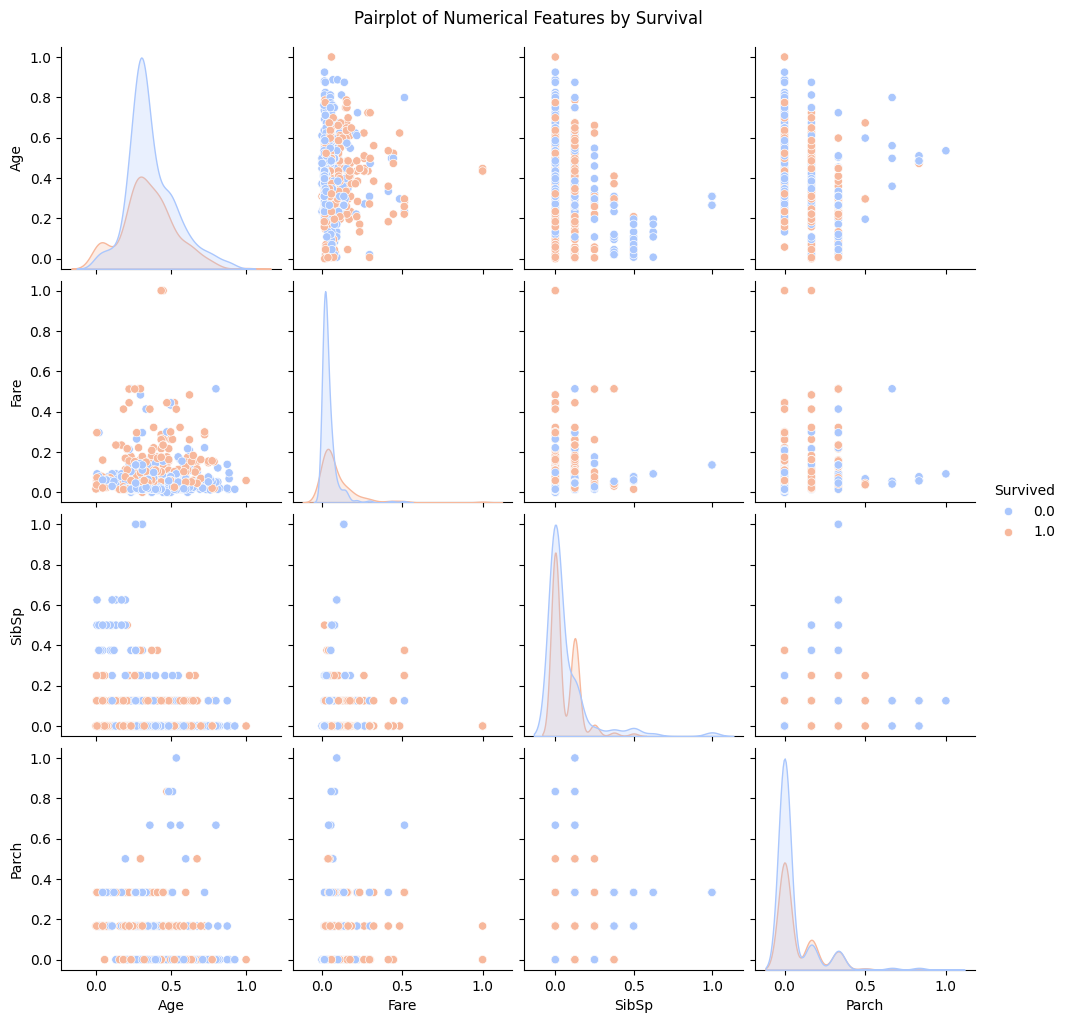

In [28]:
sns.pairplot(titanic_df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived', palette='coolwarm', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Survival', y=1.02)
plt.show()


## **Dimensionality Exploration**

### **Dimensionality Reduction**

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Select numerical features and scale them
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
titanic_scaled = StandardScaler().fit_transform(titanic[numerical_features].dropna())

# Step 2: Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components
titanic_pca = pca.fit_transform(titanic_scaled)

# Step 3: Check the explained variance
print(f"Explained variance ratio by each component: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)}")


Explained variance ratio by each component: [0.45650756 0.28297632]
Total variance explained: 0.7394838827303434


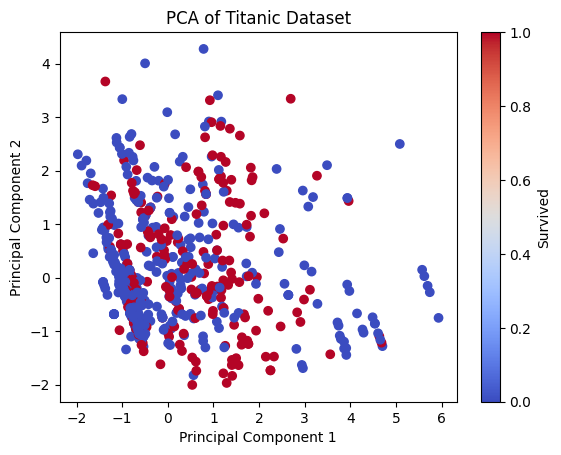

In [30]:
# Step 4: Visualize the reduced data
plt.scatter(titanic_pca[:, 0], titanic_pca[:, 1], c=titanic['Survived'], cmap='coolwarm')
plt.title('PCA of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Survived')
plt.show()

**Explanation**

This code applies Principal Component Analysis (PCA) to the Titanic dataset for dimensionality reduction and evaluates the explained variance of the components. Here's a breakdown of the steps:

1. **Select and Scale Numerical Features**:  
   The code selects four numerical features (`Age`, `Fare`, `SibSp`, `Parch`) from the Titanic dataset and scales them using `StandardScaler`. The `StandardScaler` standardizes the data by removing the mean and scaling to unit variance. This step ensures that all features have the same scale, which is important for PCA.

2. **Apply PCA for Dimensionality Reduction**:  
   PCA is applied to the scaled dataset using `PCA(n_components=2)`. This reduces the data from its original dimensions to 2 principal components. These components capture the most variance in the data while reducing the number of features.

3. **Check the Explained Variance**:  
   After applying PCA, the `explained_variance_ratio_` attribute is used to check how much variance is explained by each of the two components. The sum of the explained variance ratios indicates the total variance captured by the selected components.

4. **Print Explained Variance**:  
   The explained variance ratio for each component is printed, along with the total variance explained by the selected components.

In summary, this code scales the numerical features of the Titanic dataset, applies PCA to reduce the dimensions to two components, and checks how much of the data's variance is captured by the reduced components.


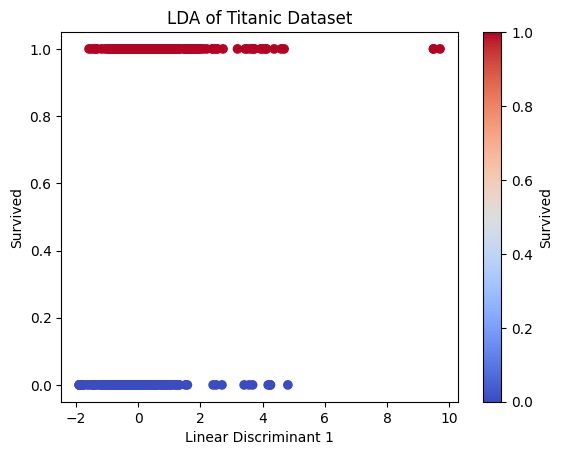

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Step 1: Prepare the target and features
X = titanic_df[numerical_features].dropna()
y = titanic_df['Survived'].dropna()

# Step 2: Apply LDA
lda = LinearDiscriminantAnalysis(n_components=1)  # We can reduce to a single component for binary target
titanic_lda = lda.fit_transform(X, y)

# Step 3: Visualize the LDA result
plt.scatter(titanic_lda, y, c=y, cmap='coolwarm')
plt.title('LDA of Titanic Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Survived')
plt.colorbar(label='Survived')
plt.show()

**Explanation**

This code applies Linear Discriminant Analysis (LDA) to the Titanic dataset for dimensionality reduction and visualizes the result. Here's a step-by-step breakdown of the process:

1. **Prepare the Target and Features**:  
   The code selects the numerical features (`Age`, `Fare`, `SibSp`, `Parch`) and the target variable (`Survived`). Missing values are dropped using `dropna()` to ensure that only valid data is used for the analysis.

2. **Apply LDA**:  
   The `LinearDiscriminantAnalysis` model is applied to reduce the data to a single component. LDA is used to maximize the separation between different classes (in this case, `Survived`), so it reduces the data while retaining the information that best separates the classes. Since `Survived` is binary, `n_components=1` is chosen to reduce the dataset to a single dimension that captures the most discriminative information.

3. **Visualize the LDA Result**:  
   The transformed data (`titanic_lda`) is plotted using `plt.scatter()`. The plot shows the values of the LDA component on the x-axis and the `Survived` target variable on the y-axis. The points are colored according to the `Survived` values using a `coolwarm` colormap, where different colors represent the two survival classes (0 for did not survive, 1 for survived).

4. **Display the Plot**:  
   The plot is labeled with a title (`'LDA of Titanic Dataset'`), and the x-axis and y-axis are labeled with `Linear Discriminant 1` and `Survived`, respectively. A colorbar is added to indicate the color representation of the survival status.

In summary, this code applies LDA to the Titanic dataset to reduce the dimensions of the data while maximizing the separation between the survival classes and visualizes the result with a scatter plot.


### **Dimensionality Expansion**


In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Step 1: Create Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False)
titanic_poly = poly.fit_transform(titanic[numerical_features].dropna())

# Step 2: Check the new feature set
poly_feature_names = poly.get_feature_names_out(numerical_features)
print(f"New feature names: {poly_feature_names}")


New feature names: ['1' 'Age' 'Fare' 'SibSp' 'Parch' 'Age^2' 'Age Fare' 'Age SibSp'
 'Age Parch' 'Fare^2' 'Fare SibSp' 'Fare Parch' 'SibSp^2' 'SibSp Parch'
 'Parch^2']


In [33]:
# One-hot encoding for 'Embarked' and 'Pclass' features
titanic_encoded = pd.get_dummies(titanic_df[['Embarked', 'Pclass']], drop_first=True)

# Combine the encoded features back into the dataset
titanic_expanded = pd.concat([titanic_df, titanic_encoded], axis=1)

# Check the new shape after expansion
print(f"Shape of original dataset: {titanic_df.shape}")
print(f"Shape of dataset after expansion: {titanic_expanded.shape}")
titanic_expanded.head()

Shape of original dataset: (891, 15)
Shape of dataset after expansion: (891, 17)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Ticket_Prefix,Ticket_Group_Size,SibSp_log,Parch_log,Fare_log,Fare_zscore,Embarked,Pclass
0,0.0,1.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.714286,0.076923,0.000000,0.117783,0.0,0.014052,-0.502445,1.0,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.0,0.139136,0.0,0.285714,0.410256,0.000000,0.117783,0.0,0.130270,0.786845,0.0,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.0,0.015469,1.0,0.714286,0.871795,0.000000,0.000000,0.0,0.015350,-0.488854,1.0,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.285714,0.358974,0.154151,0.117783,0.0,0.098618,0.420730,1.0,0.0
4,0.0,1.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.714286,0.358974,0.000000,0.000000,0.0,0.015590,-0.486337,1.0,1.0


**Explanation**

This code performs dimensionality expansion on the Titanic dataset by generating polynomial features and applying one-hot encoding. Here's a step-by-step breakdown of the process:

1. **Generate Polynomial Features**:  
   - The `PolynomialFeatures` class is used to create higher-order and interaction terms for numerical features.  
   - Missing values are removed using `.dropna()` to ensure valid inputs.  
   - The transformation includes all polynomial terms up to degree 2 (e.g., x, x², x*y) by setting `degree=2` and `interaction_only=False`.

2. **Check New Feature Names**:  
   - The `get_feature_names_out` method provides a list of the generated polynomial feature names, allowing for easy interpretation of the expanded features.

3. **One-Hot Encoding for Categorical Features**:  
   - The `pd.get_dummies` function encodes the `Embarked` and `Pclass` features into binary columns.  
   - Using `drop_first=True` avoids the dummy variable trap by excluding one redundant category for each feature.

4. **Combine Encoded Features**:  
   - The encoded features are merged back into the dataset using `pd.concat`. This ensures the expanded dataset contains both original and new features.

5. **Verify the Expanded Dataset**:  
   - The original and expanded dataset shapes are printed to confirm the addition of new features.  
   - A preview of the expanded dataset is displayed with `.head()`.

In summary, this code expands the feature space of the Titanic dataset by creating polynomial terms for numerical variables and one-hot encoded features for categorical variables, enabling more expressive input features for machine learning models.


## 📚 **Optional: Some Kaggle Notebooks Excelling in EDA for Tabular Data**

Here are three Kaggle notebooks that provide excellent Exploratory Data Analysis (EDA) for tabular datasets:

 1. [Detailed Exploratory Data Analysis with Python](https://www.kaggle.com/code/ekami66/detailed-exploratory-data-analysis-with-python?utm_source=chatgpt.com)
This notebook offers a comprehensive analysis of data, including understanding variables, handling missing data, outliers, and categorical variables. It also demonstrates visualization techniques for EDA.

 2. [EDA for Tabular Data: Advanced Techniques](https://www.kaggle.com/code/vbmokin/eda-for-tabular-data-advanced-techniques?utm_source=chatgpt.com)
A deep dive into advanced EDA techniques for tabular data, focusing on data visualization and preprocessing methods that help reveal patterns and insights in the data.

 3. [Intro to Exploratory Data Analysis (EDA) in Python](https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python?utm_source=chatgpt.com)
An introductory guide to EDA in Python, covering data visualization and preprocessing steps essential for analyzing tabular data.

These notebooks will help you master EDA techniques and apply them effectively to your datasets.
